In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
abs_mag_g = np.load('abs_mag_g.npy')
z_g = np.load('z_g.npy')
mjd_g_1 = np.load('mjd_g_1.npy')
derr_g = np.load('derr_g.npy')
magerr_g_1 = np.load('magerr_g_1.npy')

abs_mag_r = np.load('abs_mag_r.npy')
z_r = np.load('z_r.npy')
mjd_r_1 = np.load('mjd_r_1.npy')
derr_r = np.load('derr_r.npy')
magerr_r_1 = np.load('magerr_r_1.npy')

abs_mag_i = np.load('abs_mag_i.npy')
z_i = np.load('z_i.npy')
mjd_i_1 = np.load('mjd_i_1.npy')
derr_i = np.load('derr_i.npy')
magerr_i_1 = np.load('magerr_i_1.npy')

In [7]:
abs_mag_gerr = np.sqrt(magerr_g_1**2 + derr_g**2)
abs_mag_rerr = np.sqrt(magerr_r_1**2 + derr_r**2)
abs_mag_ierr = np.sqrt(magerr_i_1**2 + derr_i**2)

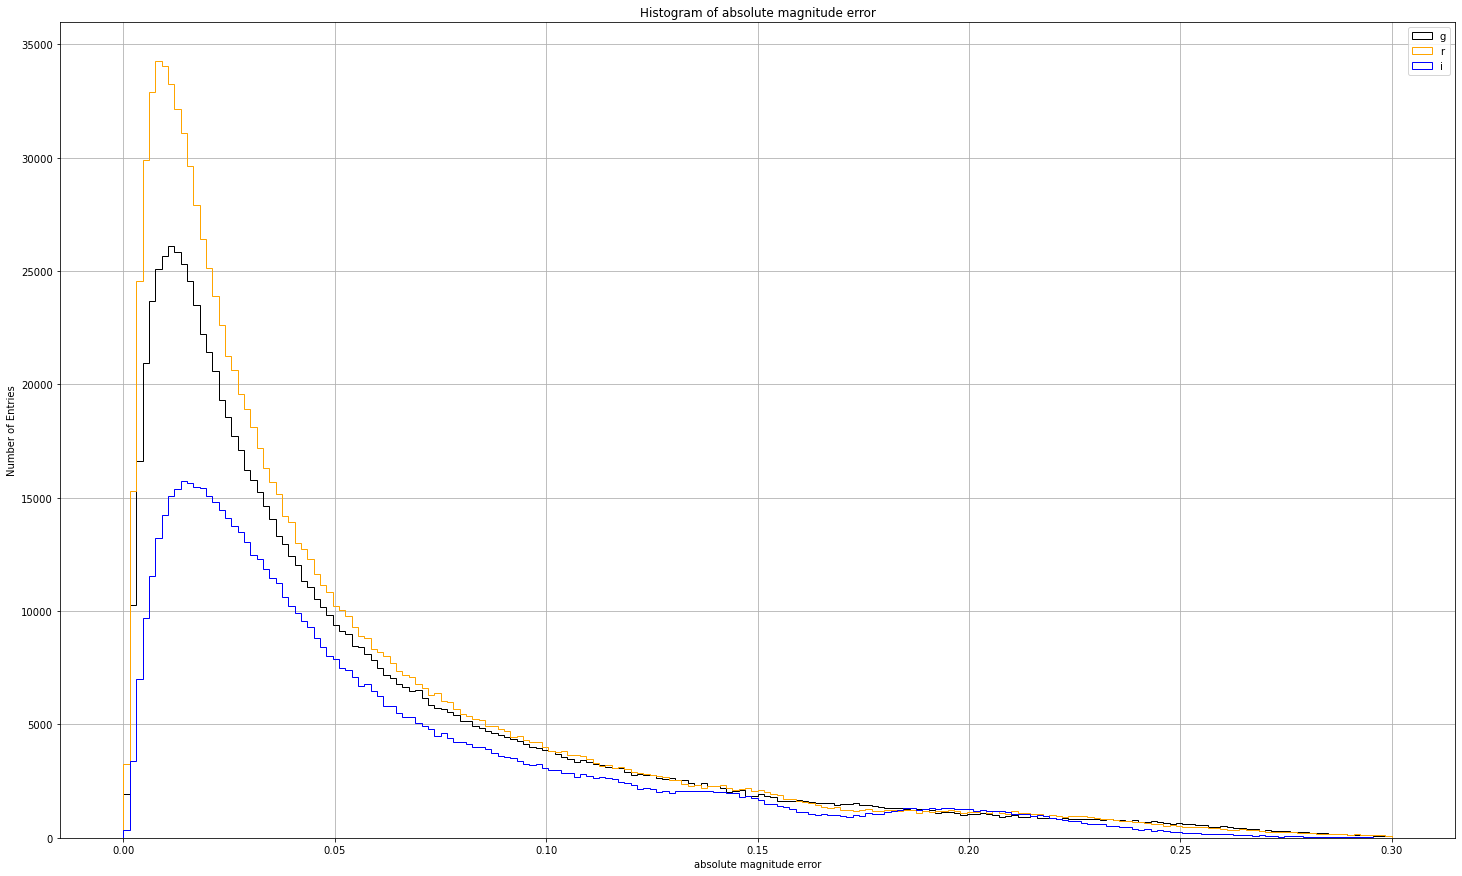

In [8]:
plt.figure(figsize=(25, 15))
# Create the histogram without filling the bars (histtype='step')
plt.hist(abs_mag_gerr, bins=200, range=(0, 0.3), histtype='step', color='black', label='g', alpha=1,density=False)
plt.hist(abs_mag_rerr, bins=200, range=(0, 0.3), histtype='step', color='orange', label='r', alpha=1,density=False)
plt.hist(abs_mag_ierr, bins=200, range=(0, 0.3), histtype='step', color='blue', label='i', alpha=1,density=False)
# Customize plot labels and appearance
plt.xlabel('absolute magnitude error')
plt.ylabel('Number of Entries')
plt.title('Histogram of absolute magnitude error')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Plot redshift versus absolute magnitude with error bars for each band/time window.

<function matplotlib.pyplot.show(close=None, block=None)>

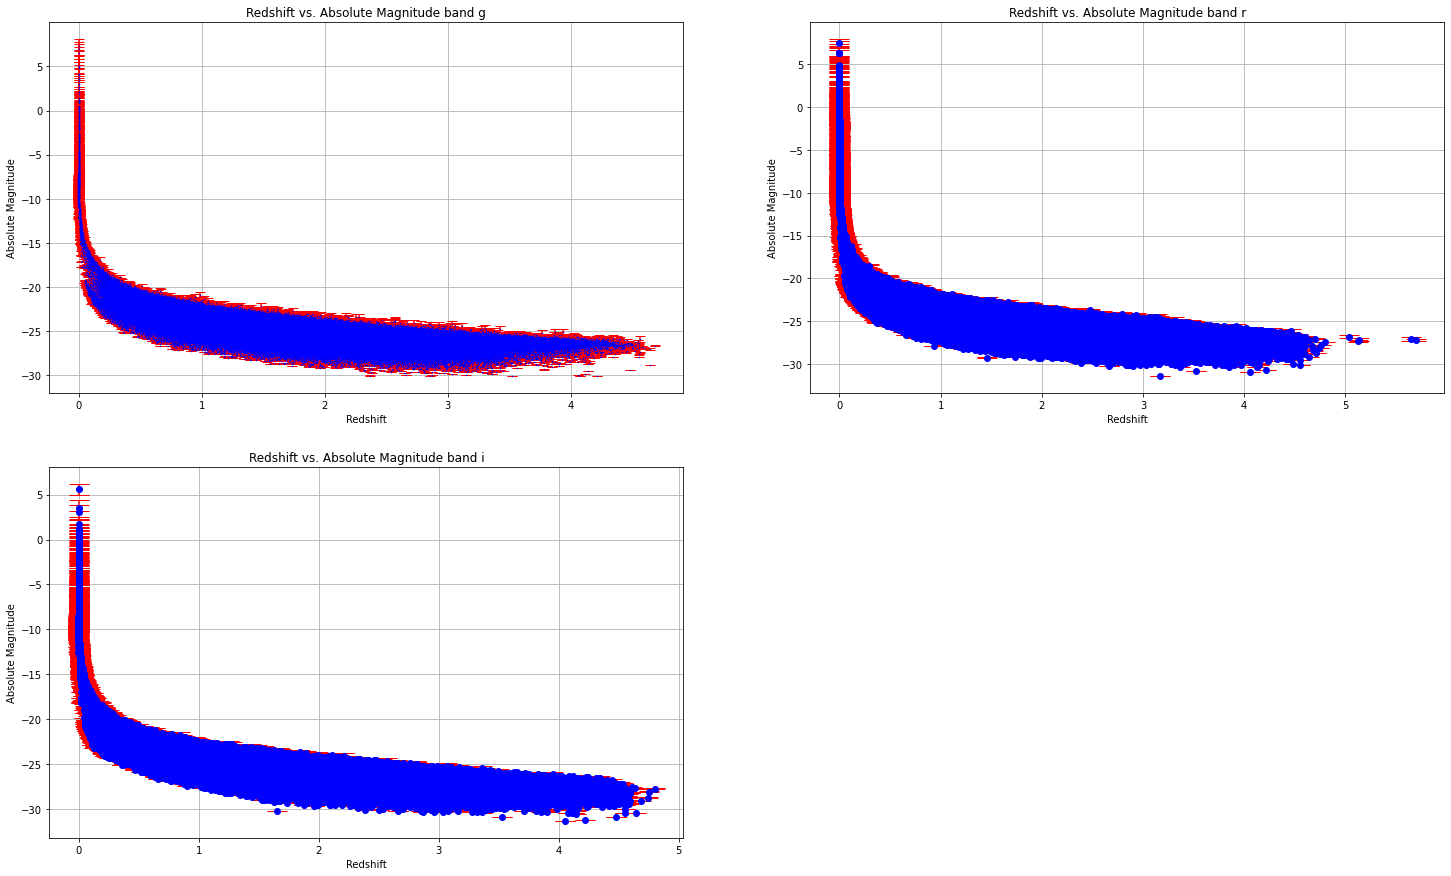

In [9]:
# Sample data (replace with your actual data)
plt.figure(figsize=(25, 15))

# Band g
plt.subplot(221)
plt.errorbar(z_g, abs_mag_g, yerr=abs_mag_gerr, fmt='o', color='b', ecolor='r', capsize=5,markersize=0.5)
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
# Band r
plt.subplot(222)
plt.errorbar(z_r, abs_mag_r, yerr=abs_mag_rerr, fmt='o', color='b', ecolor='r', capsize=10)
plt.title('Redshift vs. Absolute Magnitude band r')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
# Band i
plt.subplot(223)
plt.errorbar(z_i, abs_mag_i, yerr=abs_mag_ierr, fmt='o', color='b', ecolor='r', capsize=10)
plt.title('Redshift vs. Absolute Magnitude band i')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.show

In [10]:
def window(mjd,window,z,abs_mag,abs_magerr):
    start = np.mean(mjd) - window / 2
    end = np.mean(mjd) + window / 2
    indices = (mjd >= start) & (mjd <= end)
    zwithin_window = z[indices]
    abs_magwithin_window = abs_mag[indices]
    abs_magerrwithin_window = abs_magerr[indices]
    
    return zwithin_window,abs_magwithin_window,abs_magerrwithin_window


z_g_within_700,abs_mag_g_within_700,abs_magerr_g_within_700 = window(mjd_g_1,700,z_g,abs_mag_g,abs_mag_gerr)
z_g_within_300,abs_mag_g_within_300,abs_magerr_g_within_300 = window(mjd_g_1,300,z_g,abs_mag_g,abs_mag_gerr)
z_g_within_100,abs_mag_g_within_100,abs_magerr_g_within_100 = window(mjd_g_1,100,z_g,abs_mag_g,abs_mag_gerr)
z_g_within_50,abs_mag_g_within_50,abs_magerr_g_within_50 = window(mjd_g_1,50,z_g,abs_mag_g,abs_mag_gerr)

z_r_within_700,abs_mag_r_within_700,abs_magerr_r_within_700 = window(mjd_r_1,700,z_r,abs_mag_r,abs_mag_rerr)
z_r_within_300,abs_mag_r_within_300,abs_magerr_r_within_300 = window(mjd_r_1,300,z_r,abs_mag_r,abs_mag_rerr)
z_r_within_100,abs_mag_r_within_100,abs_magerr_r_within_100 = window(mjd_r_1,100,z_r,abs_mag_r,abs_mag_rerr)
z_r_within_50,abs_mag_r_within_50,abs_magerr_r_within_50 = window(mjd_r_1,50,z_r,abs_mag_r,abs_mag_rerr)

z_i_within_700,abs_mag_i_within_700,abs_magerr_i_within_700 = window(mjd_i_1,700,z_i,abs_mag_i,abs_mag_ierr)
z_i_within_300,abs_mag_i_within_300,abs_magerr_i_within_300 = window(mjd_i_1,300,z_i,abs_mag_i,abs_mag_ierr)
z_i_within_100,abs_mag_i_within_100,abs_magerr_i_within_100 = window(mjd_i_1,100,z_i,abs_mag_i,abs_mag_ierr)
z_i_within_50,abs_mag_i_within_50,abs_magerr_i_within_50 = window(mjd_i_1,50,z_i,abs_mag_i,abs_mag_ierr)

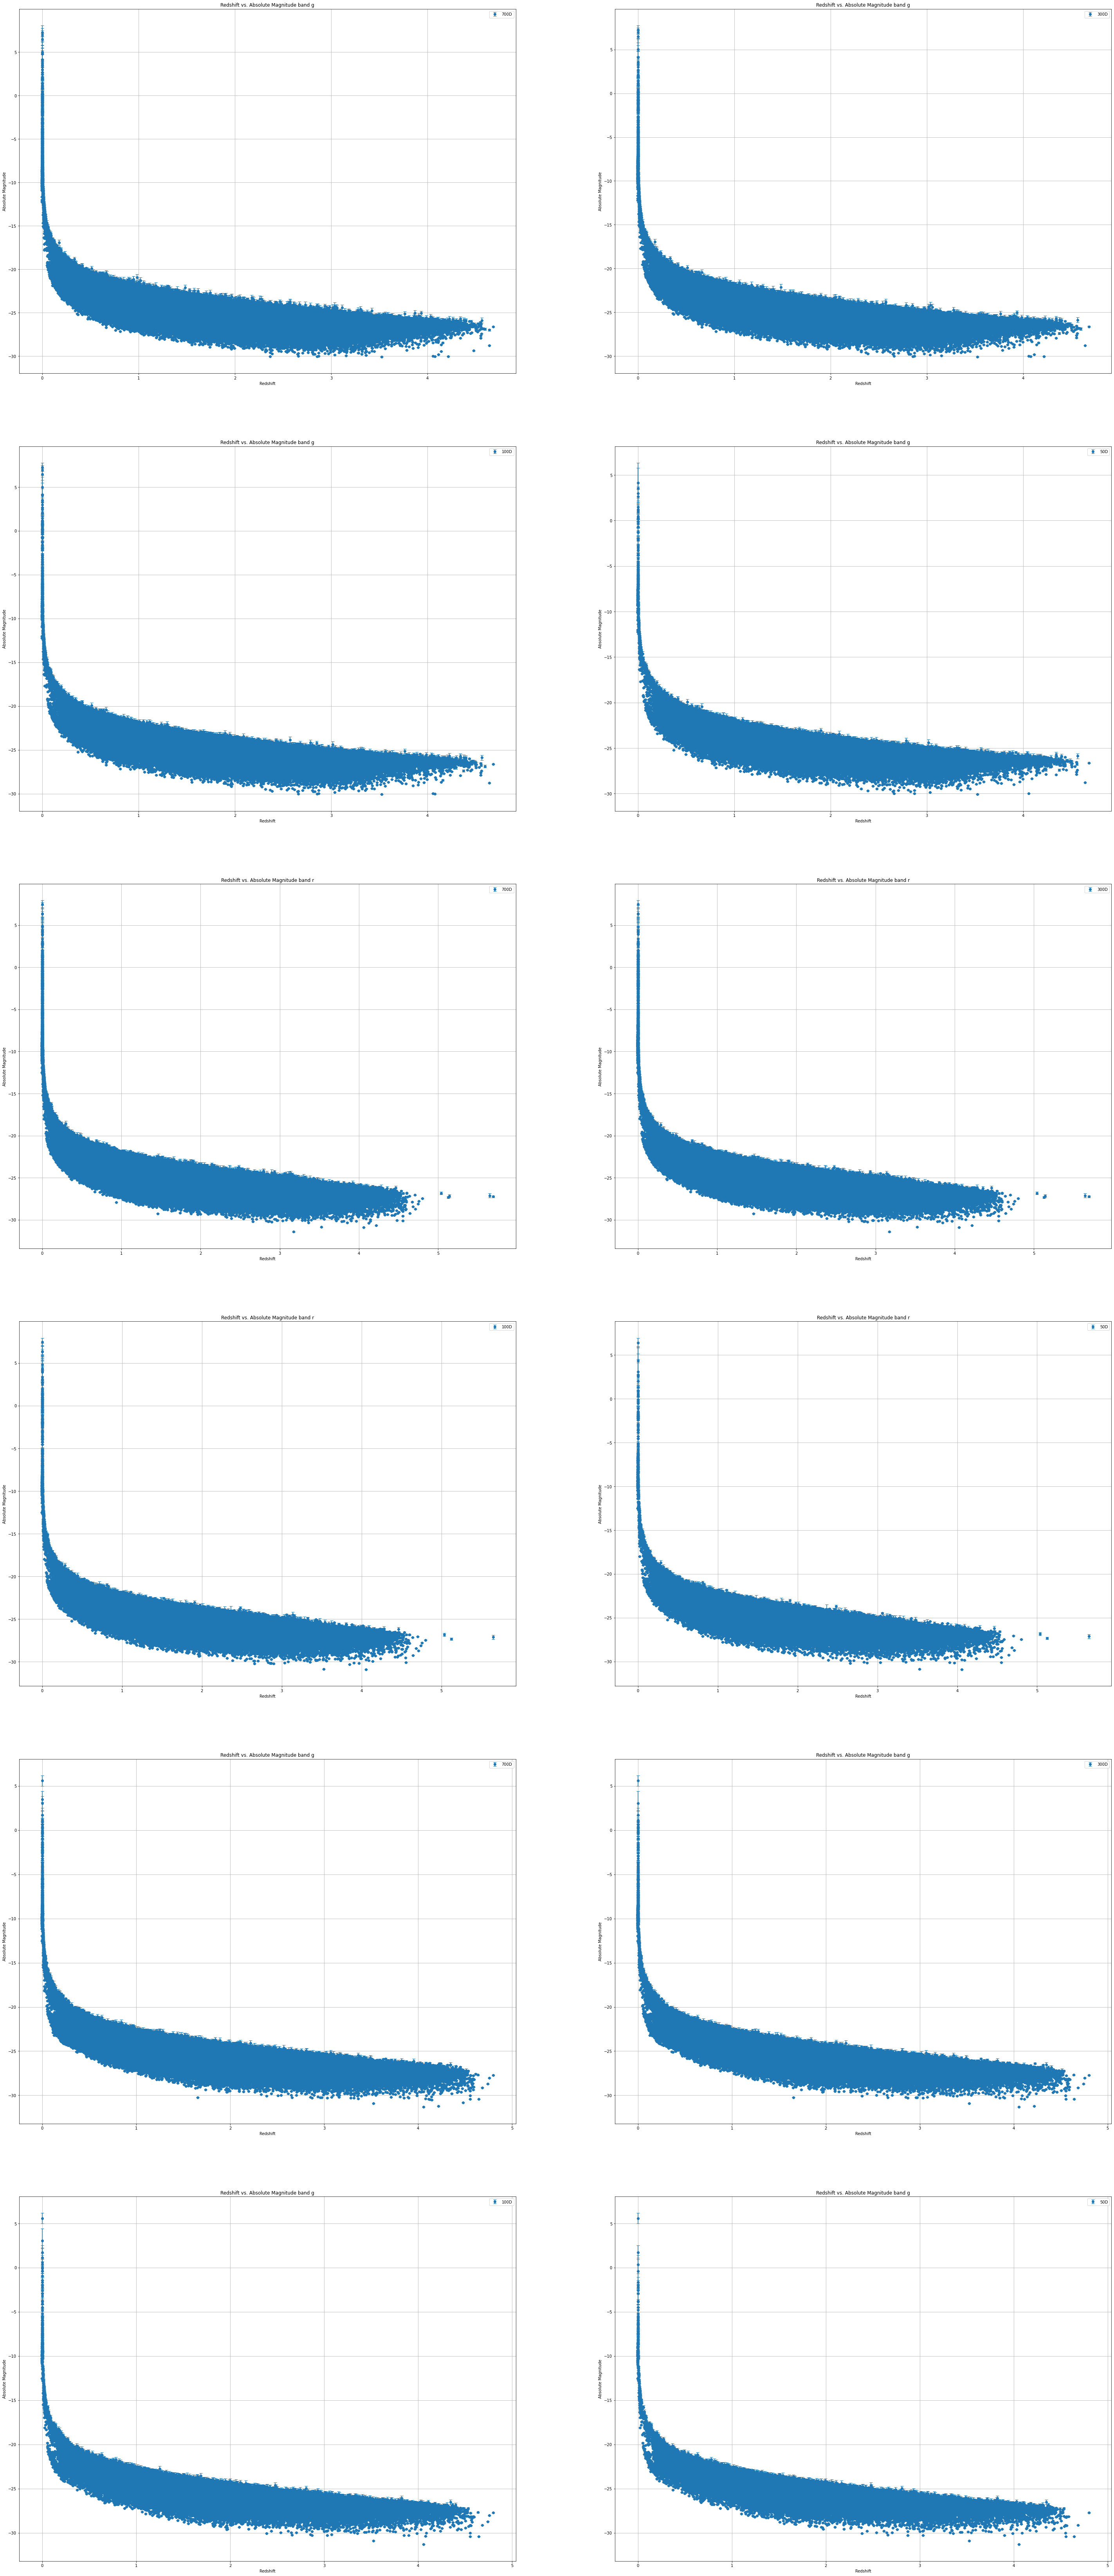

In [11]:
# Sample data (replace with your actual data)
plt.figure(figsize=(50, 120))

# Band g
plt.subplot(621)
plt.errorbar(z_g_within_700, abs_mag_g_within_700, yerr=abs_magerr_g_within_700, fmt='o', capsize=4,label='700D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(622)
plt.errorbar(z_g_within_300, abs_mag_g_within_300, yerr=abs_magerr_g_within_300, fmt='o', capsize=4,label='300D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(623)
plt.errorbar(z_g_within_100, abs_mag_g_within_100, yerr=abs_magerr_g_within_100, fmt='o', capsize=4,label='100D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(624)
plt.errorbar(z_g_within_50, abs_mag_g_within_50, yerr=abs_magerr_g_within_50, fmt='o', capsize=4,label='50D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
# Band r
plt.subplot(625)
plt.errorbar(z_r_within_700, abs_mag_r_within_700, yerr=abs_magerr_r_within_700, fmt='o', capsize=4,label='700D')
plt.title('Redshift vs. Absolute Magnitude band r')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(626)
plt.errorbar(z_r_within_300, abs_mag_r_within_300, yerr=abs_magerr_r_within_300, fmt='o', capsize=4,label='300D')
plt.title('Redshift vs. Absolute Magnitude band r')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(627)
plt.errorbar(z_r_within_100, abs_mag_r_within_100, yerr=abs_magerr_r_within_100, fmt='o', capsize=4,label='100D')
plt.title('Redshift vs. Absolute Magnitude band r')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(628)
plt.errorbar(z_r_within_50, abs_mag_r_within_50, yerr=abs_magerr_r_within_50, fmt='o', capsize=4,label='50D')
plt.title('Redshift vs. Absolute Magnitude band r')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()

#Band i
plt.subplot(629)
plt.errorbar(z_i_within_700, abs_mag_i_within_700, yerr=abs_magerr_i_within_700, fmt='o', capsize=4,label='700D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(6,2,10)
plt.errorbar(z_i_within_300, abs_mag_i_within_300, yerr=abs_magerr_i_within_300, fmt='o', capsize=4,label='300D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(6,2,11)
plt.errorbar(z_i_within_100, abs_mag_i_within_100, yerr=abs_magerr_i_within_100, fmt='o', capsize=4,label='100D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()
plt.subplot(6,2,12)
plt.errorbar(z_i_within_50, abs_mag_i_within_50, yerr=abs_magerr_i_within_50, fmt='o', capsize=4,label='50D')
plt.title('Redshift vs. Absolute Magnitude band g')
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.legend()

In [12]:
import numpyro
import numpyro.distributions as dist

In [13]:
J_g = abs_mag_g.shape[0]
J_r = abs_mag_r.shape[0]
#J_i = abs_mag_i.shape[0]
J_g_within_700 = abs_mag_g_within_700.shape[0]
J_g_within_300 = abs_mag_g_within_300.shape[0]
J_g_within_100 = abs_mag_g_within_100.shape[0]
J_g_within_50 = abs_mag_g_within_50.shape[0]
J_r_within_700 = abs_mag_r_within_700.shape[0]
J_r_within_300 = abs_mag_r_within_300.shape[0]
J_r_within_100 = abs_mag_r_within_100.shape[0]
J_r_within_50 = abs_mag_r_within_50.shape[0]
#J_i_within_700 = abs_mag_i_within_700.shape[0]
#J_i_within_300 = abs_mag_i_within_300.shape[0]
#J_i_within_100 = abs_mag_i_within_100.shape[0]
#J_i_within_50 = abs_mag_i_within_50.shape[0]

In [14]:
from jax import random
from numpyro.infer import MCMC, NUTS

In [15]:
def Model(J, sigma, y):
    mu = numpyro.sample('mu', dist.Normal(0, 10))
    tau = numpyro.sample('tau', dist.Normal(0,1))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

In [20]:
from collections import Counter
import jax.numpy as jnp
from jax import grad
def run_mcmc(J, sigma, y, batch_size=1000, tau_threshold=500):
    # Splitting data into batches
    num_batches = J // batch_size
    all_tau_samples = []  # List to store tau samples for each batch

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        
        sigma_batch = sigma[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        nuts_kernel = NUTS(Model)
        mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
        rng_key = random.PRNGKey(0)  # Splitting the key for multiple chains
        mcmc.run(rng_key, J=batch_size, sigma=sigma_batch, y=y_batch, extra_fields=('potential_energy',))
        
       # mcmc.print_summary(exclude_deterministic=False)

        # Extract tau samples for the current batch
        samples = mcmc.get_samples()
        tau_samples = samples['tau']
        
        # Check if any tau sample appears more than tau_threshold times
        unique_values, counts = np.unique(tau_samples, return_counts=True)
        if any(count > tau_threshold for count in counts):
            print(f"Skipping batch {i} due to excessive repetition of a tau value.")
            continue
        
        # If passed the threshold check, append to the list
        all_tau_samples.append(tau_samples)
    
    # Convert the list of arrays to a single combined array
    combined_tau_samples = jnp.concatenate(all_tau_samples)

    return combined_tau_samples

# Example call:
combined_tau = run_mcmc(J_g, abs_mag_gerr, abs_mag_g)


sample: 100%|██████████| 1500/1500 [00:19<00:00, 76.90it/s, 1023 steps of size 3.04e-06. acc. prob=0.80]


Skipping batch 28 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 77.83it/s, 1023 steps of size 3.17e-06. acc. prob=0.78]


Skipping batch 116 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:17<00:00, 84.41it/s, 1023 steps of size 2.43e-06. acc. prob=0.83]


Skipping batch 282 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 79.76it/s, 1023 steps of size 7.77e-07. acc. prob=0.88]


Skipping batch 355 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 78.02it/s, 1023 steps of size 1.80e-06. acc. prob=0.85]


Skipping batch 356 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 79.51it/s, 1023 steps of size 1.60e-06. acc. prob=0.88]


Skipping batch 391 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 78.58it/s, 1023 steps of size 2.50e-06. acc. prob=0.84]


Skipping batch 393 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:21<00:00, 70.37it/s, 1023 steps of size 2.35e-06. acc. prob=0.88]


Skipping batch 411 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 75.40it/s, 1023 steps of size 8.32e-07. acc. prob=0.82]


Skipping batch 426 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 80.36it/s, 1023 steps of size 2.84e-06. acc. prob=0.86]


Skipping batch 428 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 81.90it/s, 1023 steps of size 1.96e-06. acc. prob=0.83]


Skipping batch 429 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 76.71it/s, 1023 steps of size 1.69e-06. acc. prob=0.83]


Skipping batch 443 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:20<00:00, 71.88it/s, 1023 steps of size 1.80e-06. acc. prob=0.81]


Skipping batch 453 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 78.51it/s, 1023 steps of size 1.86e-06. acc. prob=0.80]


Skipping batch 463 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:21<00:00, 70.05it/s, 1023 steps of size 1.45e-06. acc. prob=0.83]


Skipping batch 487 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 77.72it/s, 1023 steps of size 1.12e-06. acc. prob=0.91]


Skipping batch 489 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 79.36it/s, 1023 steps of size 1.54e-06. acc. prob=0.84]


Skipping batch 508 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 75.69it/s, 1023 steps of size 8.52e-07. acc. prob=0.87]


Skipping batch 526 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 75.21it/s, 1023 steps of size 1.37e-06. acc. prob=0.88]


Skipping batch 537 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 76.19it/s, 1023 steps of size 1.90e-06. acc. prob=0.83]


Skipping batch 539 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 80.01it/s, 1023 steps of size 1.72e-06. acc. prob=0.83]


Skipping batch 544 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 80.09it/s, 1023 steps of size 9.52e-07. acc. prob=0.93]


Skipping batch 545 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 81.59it/s, 1023 steps of size 5.69e-07. acc. prob=0.94]


Skipping batch 554 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 81.31it/s, 1023 steps of size 2.09e-06. acc. prob=0.86]


Skipping batch 558 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:19<00:00, 76.15it/s, 1023 steps of size 1.60e-06. acc. prob=0.88]


Skipping batch 559 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:20<00:00, 71.57it/s, 1023 steps of size 1.25e-06. acc. prob=0.81]


Skipping batch 562 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 83.19it/s, 1023 steps of size 1.70e-06. acc. prob=0.88]


Skipping batch 574 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 83.02it/s, 1023 steps of size 1.30e-06. acc. prob=0.83]


Skipping batch 575 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 82.19it/s, 1023 steps of size 1.58e-06. acc. prob=0.89]


Skipping batch 576 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:18<00:00, 82.25it/s, 1023 steps of size 2.65e-06. acc. prob=0.78]


Skipping batch 581 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:20<00:00, 71.72it/s, 1023 steps of size 2.00e-06. acc. prob=0.82]


Skipping batch 790 due to excessive repetition of a tau value.


sample: 100%|██████████| 1500/1500 [00:03<00:00, 449.89it/s, 15 steps of size 2.80e-01. acc. prob=0.83] 


In [19]:
plt.figure(figsize=(25, 15))
plt.hist(combined_tau, bins=1000,  histtype='bar', color='blue', label='dispersion_g', alpha=1)

# Customize plot labels and appearance
plt.xlabel('dispersion_g')
plt.ylabel('Number of Entries')
plt.title('Histogram of dispersion for g band')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

NameError: name 'combined_tau' is not defined

<Figure size 1800x1080 with 0 Axes>

In [ ]:
combined_tau_r = run_mcmc(J_r, abs_mag_rerr, abs_mag_r)
# Customize plot labels and appearance
plt.xlabel('dispersion_r')
plt.ylabel('Number of Entries')
plt.title('Histogram of dispersion for i band')
plt.legend()

# Show the plot
plt.grid(True)
plt.show(

In [ ]:
combined_tau_i = run_mcmc(J_i, abs_mag_ierr, abs_mag_i)
# Customize plot labels and appearance
plt.xlabel('dispersion_i')
plt.ylabel('Number of Entries')
plt.title('Histogram of dispersion for i band')
plt.legend()

# Show the plot
plt.grid(True)
plt.show(

In [ ]:
combined_tau_g_within_700 = run_mcmc(J_g_within_700, abs_magerr_g_within_700, abs_mag_g_within_700)
combined_tau_g_within_300 = run_mcmc(J_g_within_300, abs_magerr_g_within_300, abs_mag_g_within_300)
combined_tau_g_within_100 = run_mcmc(J_g_within_100, abs_magerr_g_within_100, abs_mag_g_within_100)
combined_tau_g_within_50 = run_mcmc(J_g_within_50, abs_magerr_g_within_50, abs_mag_g_within_50)

combined_tau_r_within_700 = run_mcmc(J_r_within_700, abs_magerr_r_within_700, abs_mag_r_within_700)
combined_tau_r_within_300 = run_mcmc(J_r_within_300, abs_magerr_r_within_300, abs_mag_r_within_300)
combined_tau_r_within_100 = run_mcmc(J_r_within_100, abs_magerr_r_within_100, abs_mag_r_within_100)
combined_tau_r_within_50 = run_mcmc(J_r_within_50, abs_magerr_r_within_50, abs_mag_r_within_50)

#combined_tau_i_within_700 = run_mcmc(J_i_within_700, abs_magerr_i_within_700, abs_mag_i_within_700)
#combined_tau_i_within_300 = run_mcmc(J_i_within_300, abs_magerr_i_within_300, abs_mag_i_within_300)
#combined_tau_i_within_100 = run_mcmc(J_i_within_100, abs_magerr_i_within_100, abs_mag_i_within_100)
#combined_tau_i_within_50 = run_mcmc(J_i_within_50, abs_magerr_i_within_50, abs_mag_i_within_50)

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for the g, r, and i bands
plt.figure(figsize=(6, 18))

# g-band histograms
plt.subplot(311)  # Subplot for g-band
plt.hist(combined_tau_g_within_700, bins=100, range=(0, 0.3), histtype='step', color='black', label='700d', alpha=1, density=True)
plt.hist(combined_tau_g_within_300, bins=100, range=(0, 0.3), histtype='step', color='orange', label='300d', alpha=1, density=True)
plt.hist(combined_tau_g_within_100, bins=100, range=(0, 0.3), histtype='step', color='blue', label='100d', alpha=1, density=True)
plt.hist(combined_tau_g_within_50, bins=100, range=(0, 0.3), histtype='step', color='red', label='50d', alpha=1, density=True)

# Customize plot labels and appearance for g-band
plt.xlabel('Dispersion (g-band)')
plt.ylabel('Number of Entries')
plt.title('Histogram of Dispersion for g-band')
plt.legend()
plt.grid(True)
# r-band histograms
plt.subplot(312)  # Subplot for r-band
plt.hist(combined_tau_r_within_700, bins=100, range=(0, 0.3), histtype='step', color='black', label='700d', alpha=1, density=True)
plt.hist(combined_tau_r_within_300, bins=100, range=(0, 0.3), histtype='step', color='orange', label='300d', alpha=1, density=True)
plt.hist(combined_tau_r_within_100, bins=100, range=(0, 0.3), histtype='step', color='blue', label='100d', alpha=1, density=True)
plt.hist(combined_tau_r_within_50, bins=100, range=(0, 0.3), histtype='step', color='red', label='50d', alpha=1, density=True)

# Customize plot labels and appearance for r-band
plt.xlabel('Dispersion (r-band)')
plt.ylabel('Number of Entries')
plt.title('Histogram of Dispersion for r-band')
plt.legend()
plt.grid(True)
# i-band histograms
plt.subplot(313)  # Subplot for i-band
plt.hist(combined_tau_i_within_700, bins=100, range=(0, 0.3), histtype='step', color='black', label='700d', alpha=1, density=True)
plt.hist(combined_tau_i_within_300, bins=100, range=(0, 0.3), histtype='step', color='orange', label='300d', alpha=1, density=True)
plt.hist(combined_tau_i_within_100, bins=100, range=(0, 0.3), histtype='step', color='blue', label='100d', alpha=1, density=True)
plt.hist(combined_tau_i_within_50, bins=100, range=(0, 0.3), histtype='step', color='red', label='50d', alpha=1, density=True)

# Customize plot labels and appearance for i-band
plt.xlabel('Dispersion (i-band)')
plt.ylabel('Number of Entries')
plt.title('Histogram of Dispersion for i-band')
plt.legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.grid(True)
plt.show()